In [94]:
import autograd.numpy as np
from autograd import grad
import matplotlib.pyplot as plt
import math
from IPython import display
import pandas as pd
import copy


In [95]:
def initialize_with_zeros():
    w  = 0
    b = 0
    return w, b

In [96]:
# GRADED FUNCTION: propagate

def propagate(w, b, X, Y):
    # print("w",w)
    # print("b",b)
    # print("X",X)
    # print("Y",Y)

    # m = X.shape[0]

    A = np.unique((w * X + b),axis = 0)


    # print("A",A)

    cost = np.sum( (A - Y)**2 )
    # cost *= cost

    dw = -2 * np.sum(np.dot(X.T ,(A - Y)))
    db = -2 * np.sum(Y - A)


    # print("dw",dw)
    # print("db",db)

    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [97]:
# GRADED FUNCTION: optimize

def optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False):
    
    w = copy.deepcopy(w)
    b = copy.deepcopy(b)
    
    costs = []
    
    for i in range(num_iterations):
        # print(i)
        grads, cost = propagate(w,b,X,Y)
        # print("Cost",cost)

        
        dw = grads["dw"]
        db = grads["db"]
        
        w = w - learning_rate * dw
        b = b - learning_rate * db

        A = np.unique((w * X + b),axis = 0)
        
        if i % 100 == 0:
            costs.append(cost)
            print(costs)
        
            if print_cost:
                plt.scatter(X,Y)
                plt.plot(X,A)
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return 

In [98]:
def plot_it(f1,f2):
    f11 = f1.copy()
    f22 = f2.copy()
    f11 = f11.flatten()
    f22 = f22.flatten()
    plt.plot(f11, f22)

In [99]:
# GRADED FUNCTION: model

def model(X_train, Y_train, num_iterations=100, learning_rate=0.1, print_cost=False):
    w , b = initialize_with_zeros()
    # print(w)
    # print(X_train)
    # print(b)
    # print(Y_train)
    # A = w * X_train + b
    # print(A)
    # print(Y_train - A)

    
    # temp = (Y_train - A) * X_train
    # print(temp)
    

    
    # plt.scatter(X_train,Y_train)
    # plt.plot(X_train,A)

    # dw = -2 * np.sum(temp)
    # db = -2 * np.sum(Y_train - A)

    # w = w - learning_rate * dw
    # b = b - learning_rate * db

    # print(w)
    # print(b)
    
    # A2 = w * X_train + b
    # plt.plot(X_train,A2)



    optimize(w,b,X_train,Y_train,num_iterations,learning_rate,print_cost)
    
    return


In [122]:

def model_2(X_train, Y_train, num_iterations=15, learning_rate=0.1, print_cost=False):
    # Initialize parameters
    w, b = initialize_with_zeros()
    
    # Calculate predictions
    A = w * X_train + b
    
    # Plot initial predictions
    plt.figure(figsize=(8, 6))
    plt.plot(X_train, A, color='red', label='Initial prediction')
    
    for i in range(num_iterations):
        # Calculate derivatives
        temp = (Y_train - A) * X_train
        dw = -2 * np.sum(temp)
        db = -2 * np.sum(Y_train - A)
        
        # Update parameters
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        # Update predictions
        A = w * X_train + b
        
        # Plot updated predictions every 20 iterations
        if i % 20 == 0:
            print('ds')
            plt.plot(X_train, A, label=f'Iteration {i}')

    
    # # Plot final predictions
    plt.plot(X_train, A, color='green', linestyle='--', label='Final prediction')
    
    # Add labels and title
    plt.scatter(X_train, Y_train, label='Training data')
    plt.xlabel('Size')
    plt.ylabel('Price')
    plt.title('Size vs. Price Prediction')
    
    plt.legend()
    # Show plot
    plt.show()

[10 15 20 25 30 35 40 45 50 55]
[ 400  750 1100 1280 1500 1600 1950 2120 2380 2800]
ds
[10 15 20 25 30 35 40 45 50 55]
[ 400  750 1100 1280 1500 1600 1950 2120 2380 2800]
[10 15 20 25 30 35 40 45 50 55]
[ 400  750 1100 1280 1500 1600 1950 2120 2380 2800]
[10 15 20 25 30 35 40 45 50 55]
[ 400  750 1100 1280 1500 1600 1950 2120 2380 2800]
[10 15 20 25 30 35 40 45 50 55]
[ 400  750 1100 1280 1500 1600 1950 2120 2380 2800]
[10 15 20 25 30 35 40 45 50 55]
[ 400  750 1100 1280 1500 1600 1950 2120 2380 2800]
[10 15 20 25 30 35 40 45 50 55]
[ 400  750 1100 1280 1500 1600 1950 2120 2380 2800]
[10 15 20 25 30 35 40 45 50 55]
[ 400  750 1100 1280 1500 1600 1950 2120 2380 2800]
[10 15 20 25 30 35 40 45 50 55]
[ 400  750 1100 1280 1500 1600 1950 2120 2380 2800]
[10 15 20 25 30 35 40 45 50 55]
[ 400  750 1100 1280 1500 1600 1950 2120 2380 2800]
[10 15 20 25 30 35 40 45 50 55]
[ 400  750 1100 1280 1500 1600 1950 2120 2380 2800]
[10 15 20 25 30 35 40 45 50 55]
[ 400  750 1100 1280 1500 1600 1950 2120 

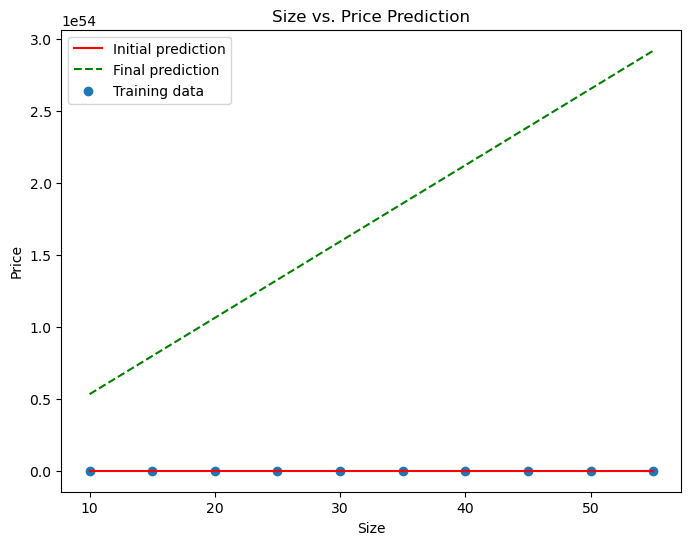

In [123]:
train = pd.read_excel('Datas.xlsx')
x = train['Size']
x = np.array(x)
# x =  x.reshape(x.shape[0], -1).T
y = train['Price']
y= np.array(y)
# y =  y.reshape(y.shape[0], -1).T
model_2(X_train = x, Y_train = y, print_cost =True)

In [1]:
a,*b = [1,2,3]

print(a,b)

1 [2, 3]


In [4]:
import re

natsort = lambda s: [int(t) if t.isdigit() else t.lower() for t in re.split('(\d+)', s)]

r=natsort("10.png")
r

r=natsort("2.png")
r


['', 2, '.png']